In [1]:
### Testing Github --> Testing, Testing ###
### Loading in Modules ###

%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The cell below I found from one of the websites on the google doc. It draws a court out using matplot.pyplot

In there I pointed out the stuff that I added. Basically just adding all the red lines that make out the way
that I think we wanted our new zones to look like.

In [2]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                         fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color="red")

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color="red")
    
    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
################# Below this line is my new code #######################
    
    #5 feet behind 3 point line
    four_arc = Arc((0, 0), 575, 575, theta1=22, theta2=158, linewidth=lw, color='red')
    
    corner_three_zone_a = Rectangle((-250, 92.5), 30, 0, linewidth=lw, color="red")
    corner_three_zone_b = Rectangle((220, 92.5), 30, 0, linewidth=lw, color="red")
    #low_left_zone = Rectangle((-125, -47.5), 125, 190, linewidth=lw, color="red", fill=False)
    #low_right_zone = Rectangle((0, -47.5), 125, 190, linewidth=lw, color="red", fill=False)
    baseline_jump_left = Rectangle((-220,-47.5), 95, 140, linewidth=lw, color="red", fill=False)
    baseline_jump_right = Rectangle((125,-47.5), 95, 140, linewidth=lw, color="red", fill=False)
    
    # Drawing 3 lines that will make divisions in mid range & 3-pointer territories
    left_line = Rectangle((-125, 92.5), 0, 167, linewidth=lw, color="red")
    right_line = Rectangle((125, 92.5), 0, 167, linewidth=lw, color="red")
    middle_line = Rectangle((0, 40), 0, 247.5, linewidth=lw, color="red")
    
    #adding line at FT that connects zones
    ft_zone_line = Rectangle((-125, 142.5), 250, 0, linewidth=lw, color="red")
    
    #adding two lines that connect restricted zones
    left_restricted_line = Rectangle((-40, -47.5), 0, 47.5, linewidth=lw, color="red")
    right_restricted_line = Rectangle((40, -47.5), 0, 47.5, linewidth=lw, color="red")
    
################# Above this line is my new code #######################

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, inner_box, outer_box,top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc,center_outer_arc,
                      center_inner_arc, four_arc, corner_three_zone_a, corner_three_zone_b,
                      baseline_jump_left, baseline_jump_right,
                     left_line, right_line, middle_line, ft_zone_line,
                     left_restricted_line, right_restricted_line]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

I wrote the function below to calculate where a players shot was given the x,y coordinates of a players shots.
They're all returned as print statements right now but we can change this function so that given a players
x,y coordinates it'll make a new column on pandas showing the shot region.

In [3]:
####### Function to check if point is within region #####
#### VERSION 1 ####

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely.affinity

def find_court_location(x_loc, y_loc):
    """
    Takes in player shot location and outputs what region of the
    court they are on. The input must be a Point Object from
    shapely.geometry module.
    """
    
    player_shot_location = Point(x_loc,y_loc)
    
    ### Defining all possible areas of the court
    
    ## Rectangular Areas
    left_corner_three = Polygon([(-250, -47.5), (-250, 92.5), (-220, 92.5), (-220, -47.5)])
    right_corner_three = Polygon([(250, -47.5), (250, 92.5), (220, 92.5), (220, -47.5)])
    
    left_base_jump = Polygon([(-220, -47.5), (-220, 92.5), (-125, 92.5), (-125, -47.5)])
    right_base_jump = Polygon([(220, -47.5), (220, 92.5), (125, 92.5), (125, -47.5)])
    
    left_near_basket = Polygon([(-125, -47.5), (-125, 142.5), (0, 142.5), (0, -47.5)])
    right_near_basket = Polygon([(125, -47.5), (125, 142.5), (0, 142.5), (0, -47.5)])
    
    ## Left & Right Wing 2s
    circle = Point(0,0).buffer(1)
    three_circle = shapely.affinity.scale(circle, 237.5, 237.5)
    
    #making two polygons that contain the area that I want. 
    #If point is inside polygon area and circle then it is in long 2 area
    left_two_polygon = Polygon([(-250, 250), (-250, 92.5), (-125, 92.5), (-125, 250)])
    right_two_polygon = Polygon([(250, 250), (250, 92.5), (125, 92.5), (125, 250)])
     
    ## Left & Right Above FT 2s
    left_two_above_FT = Polygon([(-125, 250), (-125, 142.5), (0, 142.5), (0, 250)])
    right_two_above_FT = Polygon([(125, 250), (125, 142.5), (0, 142.5), (0, 250)])
    
    ## Above 3 point line
    big_circle = shapely.affinity.scale(circle, 287.5, 287.5)
    
    left_three_polygon = Polygon([(-250,300), (-250,0), (-125, 0), (-125, 300)])
    right_three_polygon = Polygon([(250,300), (250,0), (125, 0), (125, 300)])
    
    left_mid_three_polygon = Polygon([(-125,300), (-125,0), (0, 0), (0, 300)])
    right_mid_three_polygon = Polygon([(125,300), (125,0), (0, 0), (0, 300)])
    
    ## Dealing with Restricted Zone
    # Restricted zone below hoop (0,0)
    #left_restricted_line = Rectangle((-40, -47.5), 0, 47.5, linewidth=lw, color="red")
    restrict_below_hoop = Polygon([(-40,-47.5), (-40,0), (40, 0), (40, -47.5)])
    restrict_above_hoop = Polygon([(-40,0), (-40,40), (40, 40), (40, 0)])
    restrict_circle = shapely.affinity.scale(circle, 40, 40)
    
    if left_corner_three.contains(player_shot_location):
        print('3 pointer Left Corner')
    
    elif right_corner_three.contains(player_shot_location):
        print('3 pointer Right Corner')
        
    elif left_base_jump.contains(player_shot_location):
        print('2 pointer Left Baseline')
    
    elif right_base_jump.contains(player_shot_location):
        print('2 pointer Right Baseline')
        
    ##################### Restricted Zone ##################
    elif restrict_below_hoop.contains(player_shot_location):
        print('Restricted Area')
        
    elif left_near_basket.contains(player_shot_location) & restrict_above_hoop.contains(player_shot_location) & restrict_circle.contains(player_shot_location):
        print('Restricted Area')
        
    elif right_near_basket.contains(player_shot_location) & restrict_above_hoop.contains(player_shot_location) & restrict_circle.contains(player_shot_location):
        print('Restricted Area')
        
    elif right_near_basket.contains(player_shot_location):
        print('2 pointer Left near basket')
        
    elif left_near_basket.contains(player_shot_location):
        print('2 pointer Right near basket')
    
    ######################################################
    elif three_circle.contains(player_shot_location) & left_two_polygon.contains(player_shot_location):
        print('2 pointer Left wing')
        
    elif three_circle.contains(player_shot_location) & right_two_polygon.contains(player_shot_location):
        print('2 pointer Right wing')
        
    elif three_circle.contains(player_shot_location) & left_two_above_FT.contains(player_shot_location):
        print('2 pointer Left above FT')
        
    elif three_circle.contains(player_shot_location) & right_two_above_FT.contains(player_shot_location):
        print('2 pointer Right above FT')
        
    elif big_circle.contains(player_shot_location) & left_three_polygon.contains(player_shot_location):
        print('3 pointer Left')
        
    elif big_circle.contains(player_shot_location) & right_three_polygon.contains(player_shot_location):
        print('3 pointer Right')
        
    elif big_circle.contains(player_shot_location) & left_mid_three_polygon.contains(player_shot_location):
        print('3 pointer Middle Left')
    
    elif big_circle.contains(player_shot_location) & right_mid_three_polygon.contains(player_shot_location):
        print('3 pointer Middle Right')
        
    else:
        print('Out of bounds')

Visualize Shot function takes in draw court function & find_court_location and outputs a graph of the court,
where the shot was taken and prints out what the region was.

In [4]:
def visualize_shot(x,y):
    
    find_court_location(x,y)
    
    plt.figure(figsize=(12,11))

    draw_court()
    
    # Adjust plot limits to just fit in half court
    plt.xlim(-250,250)
    
    # Descending values along th y axis from bottom to top
    # in order to place the hoop by the top of plot
    plt.ylim(422.5, -47.5)
    
    # get rid of axis tick labels
    plt.tick_params(labeltop=True, labelleft=True, labelbottom=False, labelright=True)
    plt.plot(x,y, marker='X', markersize=20, color = 'green')
    plt.show()

Try testing out the cell below with different x,y coordinates. If its outside the zones, it should say out of bounds.

Out of bounds


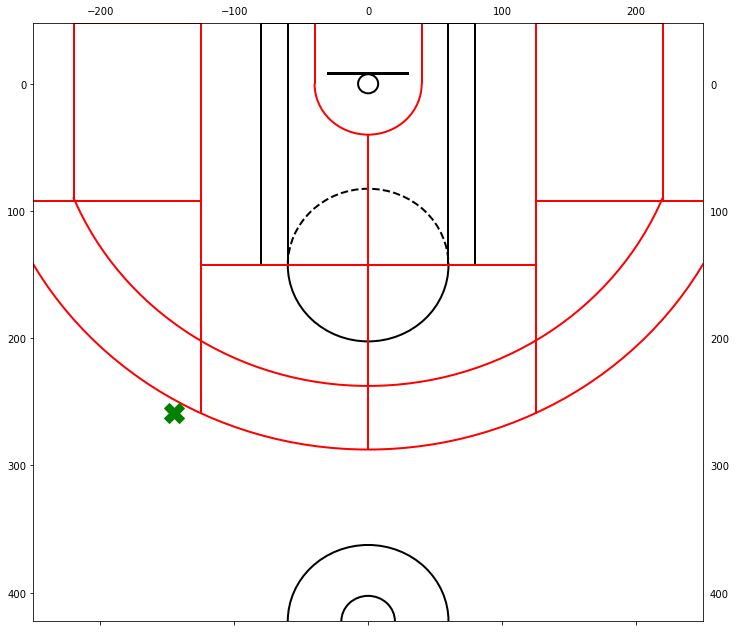

In [6]:
#### The one thing I need to do now, that I haven't finished yet is disregarding shots in the restricted area
# if we decide to do that
#restrict_below_hoop = Polygon([(-40,-47.5), (-40,0), (40, 0), (40, 47.5)])
visualize_shot(-145,259)